# Data information



The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.


## Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.





# Motivation

In the U.S. approximately 9% of total retail sales comes from an e-commerce website. In fact, companies like Amazon have created retail empires off being such a huge e-commerce website. With e-commerce becoming more and more prevalent in today’s economy it is important for businesses within this sector to understand what factors into a site visitor making a purchase, and being able to put their attention on potential customers. We thought it would be interesting to look into if it’s possible to predict the buying behavior of a site visitor as this can have many implications such as E-commerce website able to better target ads or figure out factors that may lead to increased sales.

## Data Characteristics and Initial Exploration
The data used in this analysis is an Online Shoppers Purchasing Intention data set provided on the UC Irvine’s Machine Learning Repository. The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website. The variables in the data set can be split into these three categories: data related to the page that the user lands on, Google Analytics metrics, and user visit data. 

Upon initially exploring the data, the first thing I noticed was the imbalance in the labels. In this data set 85% of the site visitors did not end up making a purchase, the assumption was that majority of people window shop and did usually do not want to commit to a purchase.

# Settings

In [31]:
# first we need to import our numerical package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import datetime
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings

# Import Data

In [32]:
## Read the .xlsx file with the pandas read_csv method
df = pd.read_csv('online_shoppers_intention.csv')
df.drop_duplicates(inplace=True)

In [33]:
df = df.rename(str.lower, axis='columns')

In [34]:
df.shape

(12205, 18)

In [35]:
df.nunique()

administrative               27
administrative_duration    3335
informational                17
informational_duration     1258
productrelated              311
productrelated_duration    9551
bouncerates                1872
exitrates                  4777
pagevalues                 2704
specialday                    6
month                        10
operatingsystems              8
browser                      13
region                        9
traffictype                  20
visitortype                   3
weekend                       2
revenue                       2
dtype: int64

In [36]:
list(df)

['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday',
 'month',
 'operatingsystems',
 'browser',
 'region',
 'traffictype',
 'visitortype',
 'weekend',
 'revenue']

In [37]:
l_target = ['revenue']
l_num = ['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday',
# 'operatingsystems',
#  'browser',
 # 'region',
#  'traffictype'
        ]
l_bool = ['weekend']
l_cat = ['month', 'visitortype', 'browser', 'operatingsystems',  'traffictype', 'region']

In [38]:
for i in ['weekend', 'revenue']:
    df[i] = df[i].astype(int)

In [39]:
df = pd.get_dummies(df, columns = l_cat)

In [40]:
df

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,...,traffictype_20,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,1,0,0,0,0,0,0,0,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,1,0,0,0,0,0,0


# Data

In [41]:
df.revenue.value_counts()/len(df)

0    0.843671
1    0.156329
Name: revenue, dtype: float64

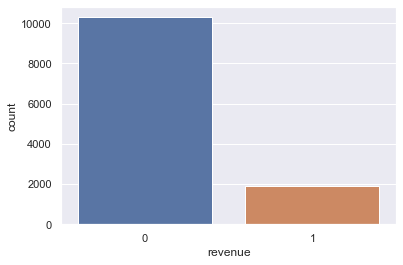

In [42]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="revenue", data=df)

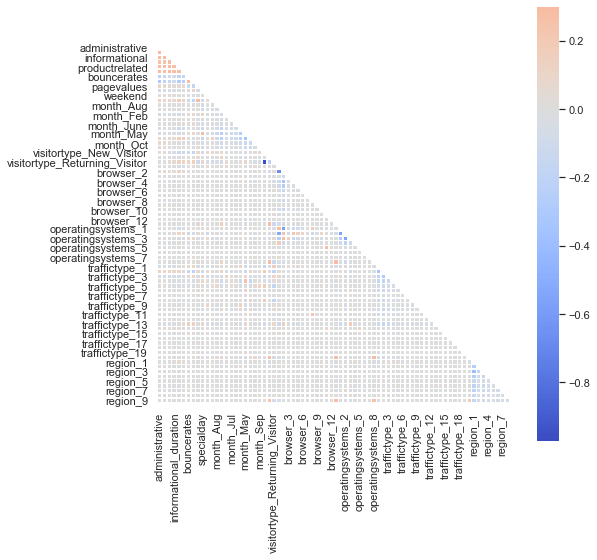

In [43]:
from matplotlib import pyplot
corr= df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = fig, ax = pyplot.subplots(figsize=(8,8))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=.5,cmap='coolwarm',center=0, )
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

In [44]:
import imblearn
from imblearn.over_sampling import SMOTE 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [45]:
X = df.drop(columns = ['revenue'])
y = df['revenue']


In [46]:
df_d = df.describe()
df_d

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,...,traffictype_20,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,...,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,...,0.015813,0.386235,0.092421,0.194920,0.095944,0.026055,0.065629,0.062106,0.035313,0.041376
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,...,0.124757,0.486906,0.289631,0.396155,0.294527,0.159305,0.247642,0.241357,0.184578,0.199168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
df_d['administrative'].iloc[-1]

27.0

In [48]:
min_dict = {}
max_dict = {}
for i in list(df_d):
    min_dict[i] = df_d[i].iloc[3]
    max_dict[i] = df_d[i].iloc[-1]
    
import json

with open('min_dict.json', 'w') as fp:
    json.dump(min_dict, fp)
with open('max_dict.json', 'w') as fp:
    json.dump(max_dict, fp)

In [49]:
max_dict['pagevalues']

361.76374189999996

In [50]:
max_dict

{'administrative': 27.0,
 'administrative_duration': 3398.75,
 'informational': 24.0,
 'informational_duration': 2549.375,
 'productrelated': 705.0,
 'productrelated_duration': 63973.522229999995,
 'bouncerates': 0.2,
 'exitrates': 0.2,
 'pagevalues': 361.76374189999996,
 'specialday': 1.0,
 'weekend': 1.0,
 'revenue': 1.0,
 'month_Aug': 1.0,
 'month_Dec': 1.0,
 'month_Feb': 1.0,
 'month_Jul': 1.0,
 'month_June': 1.0,
 'month_Mar': 1.0,
 'month_May': 1.0,
 'month_Nov': 1.0,
 'month_Oct': 1.0,
 'month_Sep': 1.0,
 'visitortype_New_Visitor': 1.0,
 'visitortype_Other': 1.0,
 'visitortype_Returning_Visitor': 1.0,
 'browser_1': 1.0,
 'browser_2': 1.0,
 'browser_3': 1.0,
 'browser_4': 1.0,
 'browser_5': 1.0,
 'browser_6': 1.0,
 'browser_7': 1.0,
 'browser_8': 1.0,
 'browser_9': 1.0,
 'browser_10': 1.0,
 'browser_11': 1.0,
 'browser_12': 1.0,
 'browser_13': 1.0,
 'operatingsystems_1': 1.0,
 'operatingsystems_2': 1.0,
 'operatingsystems_3': 1.0,
 'operatingsystems_4': 1.0,
 'operatingsystems_5'

## create a test set

In [51]:
msk

NameError: name 'msk' is not defined

In [52]:
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

In [53]:
df_train['revenue'].value_counts(normalize=True)

0    0.842831
1    0.157169
Name: revenue, dtype: float64

In [54]:
df_test['revenue'].value_counts(normalize=True)

0    0.847078
1    0.152922
Name: revenue, dtype: float64

In [55]:
X_train = df_train.drop(columns = ['revenue'])
y_train = df_train['revenue']

In [56]:
X_test = df_test.drop(columns = ['revenue'])
y_test = df_test['revenue']

In [57]:
%%time
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_sample(X_train, y_train)
X_train, y_train = X_res, y_res

CPU times: user 82.4 ms, sys: 14.9 ms, total: 97.2 ms
Wall time: 102 ms


In [58]:
y_res.value_counts(normalize=True,sort=False)

0    0.5
1    0.5
Name: revenue, dtype: float64

In [59]:
X_test.administrative.value_counts()

0     1151
1      261
2      218
4      156
3      142
5      122
6       87
8       60
7       59
9       48
10      35
12      18
11      15
13      12
14       9
15       7
17       4
16       4
18       3
21       1
23       1
Name: administrative, dtype: int64

In [60]:
# df

In [61]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X_res, 
#                                                     y_res, 
#                                                     test_size = 0.20, 
#                                                     random_state = 0)
# x_train, x_test, y_train, y_test = train_test_split(X, 
#                                                     y, 
#                                                     test_size = 0.20, 
#                                                     random_state = 0)

for classification models accuracy is just a percentage of the data that you predicted correctly.Here, we fit (train) the model (logistic regression), for training we need x_train and y_train. Once the model is trained, pass it the testing data to see if we get predictions back. To do so, we invoke the .predict(x_test) method. We can also invoke the .predict_proba(x_test) method if we wish to get the raw probabilites instead of the final predictions.We don't need to pass the labels, because in order to predict, We don't need to know what labels are. 

# Models

## Logistic regression (with SMOTE)

In [62]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_test_pred=lr.predict(X_test)

Get the accuracy of the model by loading from sklearn.metrics import accuracy_score and calling the accuracy_score function.I did my training. I did my prediction and now I am doing my evaluation, meaning that I am going to see how close the predictions come to the ground truth.

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.8736013261500207

Is accuracy a good metric for evaluating this model? Why or why not? So if we had a machine learning model that predicted that all of the shoppers won't buy No matter what you know about any other piece of information in the data sets, I'm just going to predict that all of shoppers won't buy, I should be correct about 84% of the time . What the model did is it took a look at all of the other information that we know about the shoppers, all the information that is in the data here.it was able to improve on that baseline accuracy. If you want to think of the 84% as a baseline accuracy on false prediction. currently my model was not able to improve on that baseline accuracy. The most direct metric to look at, is the confusion matrix.
First thing that we can look it up at any kind of classification model is we can look at a confusion matrix.confusion matrix says on the rows I'm going to show you the true labels. So at the top are shoppers that did purchase and the bottom are shoppers that didn't purchase and then on the columns, I'm going to show you the predictions. So the first column is shoppers that we predicted to purchase. And then the second column are shoppers that we predicted to not purchase .And so when you look at the diagonal terms in the classification in the confusion matrix, those are predictions that match the true value.And the off diagonal ones are predictions that don't match.Confusion matrix is very useful and intuitive because we can see different types of errors.

In [65]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_test_pred)
print(cm)

[[1869  175]
 [ 130  239]]


From the confusion matrix, we can derive accuracy, precision, recall, and the F1-score, which is a sort of average of precision and recall.

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2044
           1       0.58      0.65      0.61       369

    accuracy                           0.87      2413
   macro avg       0.76      0.78      0.77      2413
weighted avg       0.88      0.87      0.88      2413



One way to visually evaluate a binary classification model is using the ROC plot. The area under the ROC plot is called AUC (area under the curve) and the closer it is to 1, the better the model.
The ROC is much more helpful when you're comparing multiple models to see which one of them is more accurate because if one model has a curve that is kind of close to the 45 degree line and another model has a curve that is just above the the first model across the entire plot.Then that's a model that does better across the board. From the ROC plot, We can also grab another metric called AUC which stands for area under the curve. The area of everything that is under the blue line is what we call the AUC . The higher is the AUC, the better is my model. 

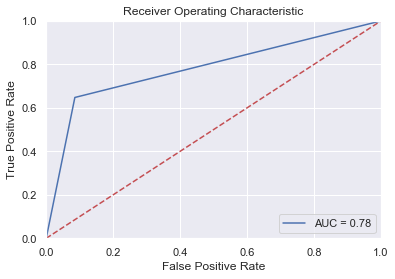

In [67]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_auc_lr, fpr_lr, tpr_lr, thresholds_lr = roc_auc, fpr, tpr, thresholds

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic regression with cross validation

In this section, we train the same logistic regression classifier, but use cross-validation to tune it.I need to set the random state.So that doesn't change the model itself and then max-iter is just something about the number of steps that you want to let this run before the model either converge or give up.

In [68]:
from sklearn.linear_model import LogisticRegressionCV
clr = LogisticRegressionCV(cv = 5, random_state = 0, max_iter = 1000)
clr.fit(X_train, y_train)
predictions = clr.predict(X_test)
np.unique(predictions, return_counts = True)

(array([0, 1]), array([2090,  323]))

In [69]:
accuracy_score(predictions, y_test)

0.8864484044757563

In [70]:
metrics.confusion_matrix(y_test, predictions)

array([[1930,  114],
       [ 160,  209]])

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2044
           1       0.65      0.57      0.60       369

    accuracy                           0.89      2413
   macro avg       0.79      0.76      0.77      2413
weighted avg       0.88      0.89      0.88      2413



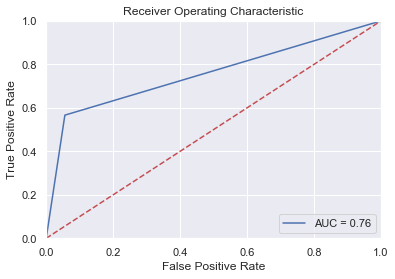

In [72]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
roc_auc_lrcv = roc_auc

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Regularization

In [73]:
from sklearn import linear_model

alpha = 0.25 # increasing alpha can shrink more variable coefficients down to 0
clf = linear_model.Lasso(alpha = alpha)
clf.fit(X_train, y_train)

Lasso(alpha=0.25, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
clf.coef_

array([ 0.00000000e+00,  8.56198563e-05, -0.00000000e+00,  3.44828602e-05,
        6.77776473e-04,  2.82509305e-05, -0.00000000e+00, -0.00000000e+00,
        8.80934664e-03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

So these are the coefficients for the model.when we do L1 regularization we're taking like the absolute value of A plus the absolute value of b zero plus blah.And you're saying that this some needs to be below some kind of threshold and what the threshold is is controlled by the regularization parameter. 

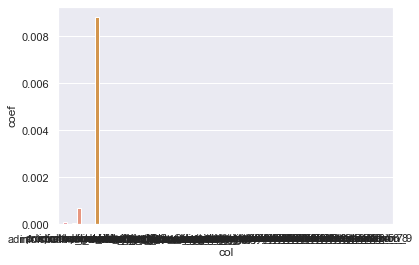

In [75]:
dd = pd.DataFrame({'col': X_train.columns, 'coef': clf.coef_})
ax = sns.barplot(x = 'col', y = 'coef', data = dd)

We can plot the coefficients of the model we trained using a barplot. Notice how some of the coefficients are zero, meaning they were effectively dropped out of the model.

I saw the result of one model using alpha = 0.25. Now let's see what happens when I train many models with different values for alpha. To keep track of it all, I created a DataFrame where I store the choice of alpha I used and the model's coefficients.

In [76]:
results = pd.DataFrame(columns = ['alpha', 'col', 'coef'])

for alpha in np.arange(0.01, 5, .01):
    clf = linear_model.Lasso(alpha = alpha)
    clf.fit(X_train, y_train)
    dd = pd.DataFrame({'col': X_train.columns, 'coef': clf.coef_})
    dd['alpha'] = alpha
    results = results.append(dd, sort = False)

In [77]:
results.head()

,alpha,col,coef
0,0.01,administrative,0.003145
1,0.01,administrative_duration,0.000033
2,0.01,informational,-0.000000
3,0.01,informational_duration,0.000045
4,0.01,productrelated,0.000845


In [78]:
results['abs_coef'] = abs(results['coef'])

In [79]:
results = results.sort_values(by = 'abs_coef', ascending=False)

In [80]:
results

,alpha,col,coef,abs_coef
39,0.01,operatingsystems_3,-0.229315,0.229315
17,0.01,month_May,-0.179170,0.179170
12,0.01,month_Dec,-0.145366,0.145366
37,0.01,operatingsystems_1,-0.141664,0.141664
38,0.01,operatingsystems_2,-0.137535,0.137535
...,...,...,...,...
26,1.72,browser_3,-0.000000,0.000000
25,1.72,browser_2,-0.000000,0.000000
24,1.72,browser_1,-0.000000,0.000000
23,1.72,visitortype_Returning_Visitor,-0.000000,0.000000


In [81]:
results.groupby('alpha')['abs_coef'].apply(list)

alpha
0.01    [0.22931463221568135, 0.17917016807793146, 0.1...
0.02    [0.11578895117195293, 0.08743004292993076, 0.0...
0.03    [0.058973365036741, 0.03905238679038565, 0.026...
0.04    [0.009144906397039966, 0.0010959241643403485, ...
0.05    [0.009128989545488499, 0.0010868625398443525, ...
                              ...                        
4.95    [0.001593490571201894, 4.2933947439851186e-05,...
4.96    [0.0015781598680095707, 4.292729545096988e-05,...
4.97    [0.0015628291648172488, 4.2920643462088566e-05...
4.98    [0.0015474984616249243, 4.291399147320725e-05,...
4.99    [0.0015321677584326009, 4.2907339484325946e-05...
Name: abs_coef, Length: 499, dtype: object

I can plot the value of coefficients against alpha to see what happens to the coefficents as we increase the shrinkage constant alpha.

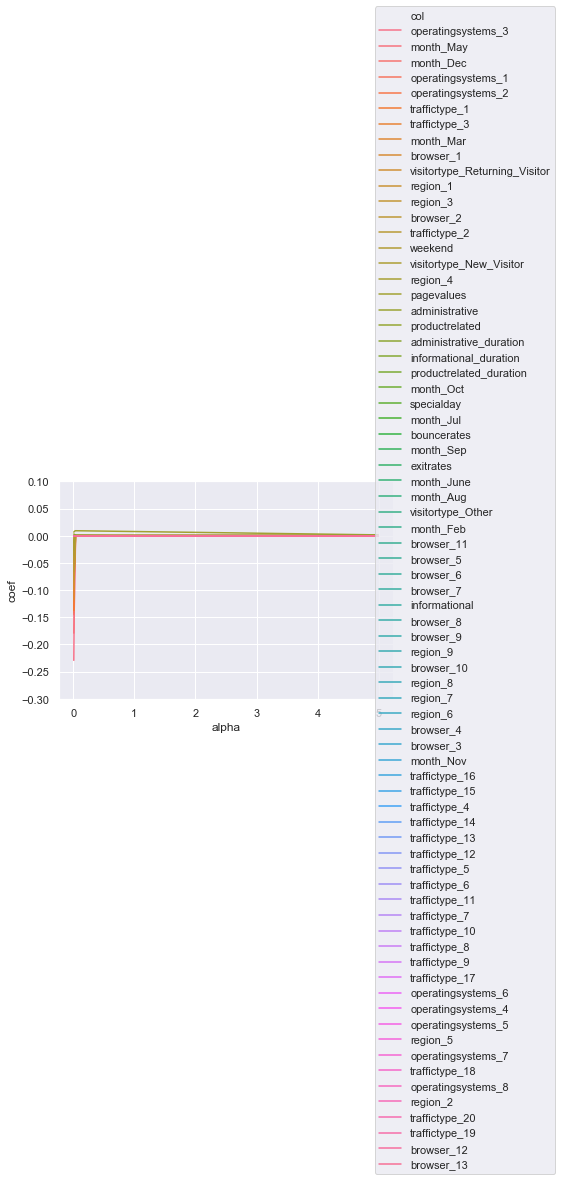

In [82]:
ax = sns.lineplot(x = 'alpha', y = 'coef', hue = 'col', data = results)
ax.set(ylim = (-0.3, 0.1))
ax.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5), ncol = 1);

So what this plot is showing is basically saying that, if you start with alpha equals zero and you increase alpha to five.That's the same as saying, I'm going to start with no regularization to more and more regularization as I move to the right. And then on the Y axis, I see the actual value for the coefficients of all of the features in the data.So as I move from left to right.drifting towards zero. And eventually, the more regularization, we do the more coefficient zero out. the advantage of L1. It does feature selection.We just regularized and because we use a one regularization, it has this nice property that some coefficients that are less important drift toward zero earlier than the ones that are more important.

## Random forest 

So random forest classifier is a bagging classifier that uses a decision tree as the base learner.

In [86]:
from sklearn.ensemble import RandomForestClassifier

# hypers = {"n_estimators": 100, "max_features": "sqrt", "max_depth": 20, "min_samples_leaf": 10}
# clf_rf = RandomForestClassifier(random_state = 0, verbose = True, **hypers)

In [91]:
clf_rf = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=18, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [92]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=18, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

If you see a message about using a sequential backend, it's because a random forest is an algorithm that can easily run in parallel by just training many trees concurrently.

One by product of tree-based models is that they provide us with a list showing the relative importance of each feature to the model. So even if we're not interested in the trained model the random forest returns, we can still use it for **feature selection**: namely train the random forest on the whole data to get the top $n$ most important features and later pass only those features to another algorithm we wish to use to train a model. Note that because we one-hot-encoded the data, a feature here is not just one of the categorical columns, but each category of each categorical column is its own feature. We can find the feature importance values in `clf_rf.feature_importances_`.

In [ ]:
import pickle
from joblib import dump, load
dump(clf_rf, 'clf_rf.joblib') 
clf_rf = load('clf_rf.joblib') 

In [53]:
len(clf_rf.feature_importances_)

74

Let's store the feature importance values in a `DataFrame` and use `seaborn` to visualize the top 10.

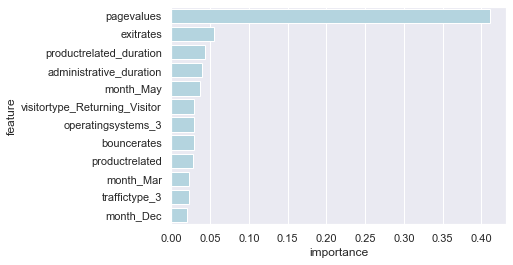

In [56]:
df_var_imp = pd.DataFrame({"feature": X_train.columns, 
                           "importance": clf_rf.feature_importances_})
df_var_imp.sort_values(by = "importance", ascending = False, inplace = True)

import seaborn as sns
ax = sns.barplot(x = "importance", y = "feature", data = df_var_imp.head(12), color = "lightblue")

To get predictions from the trained model, we simply call the `predict` method and pass it the data. To check if we're overfitting or not, we can get predictions for both the training and the test data. Once we have the predictions, we can call the `accuracy_score` function to get the accuracy on the training and test data, assuming that accuracy is a good metric to use here.



In [57]:
Y_hat_train = clf_rf.predict(X_train)
Y_hat_test = clf_rf.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, Y_hat_train)
acc_test = accuracy_score(y_test, Y_hat_test)

In [59]:
acc_test

0.8951678951678952

In [60]:
acc_train

0.9542313288069835

I will store some important results in a table we call `results`. If this table doesn't exist (first time we run it) it will initialized by the code below.

In [393]:
print(classification_report(y_test, Y_hat_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2053
           1       0.64      0.70      0.67       376

    accuracy                           0.89      2429
   macro avg       0.79      0.81      0.80      2429
weighted avg       0.90      0.89      0.90      2429



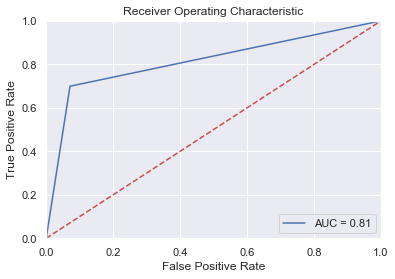

In [394]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_hat_test)
roc_auc = metrics.auc(fpr, tpr)
roc_auc_rf, fpr_rf, tpr_rf, thresholds_rf = roc_auc, fpr, tpr, thresholds

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [395]:
#try:
    #results # checks if this object exists or not
#except NameError:
    #results = pd.DataFrame(columns = ["algo", "acc_train", "acc_test"]) # initiates it

In [396]:
#model_name = str(clf_rf.__class__).split('.')[-1].strip("\"\'>")
#results.loc[len(results), 0:3] = [model_name, acc_train, acc_test]

#for hp in hypers.keys():
    #results.loc[len(results) - 1, hp] = hypers[hp]

## Random forest with selected features

So random forest classifier is a bagging classifier that uses a decision tree as the base learner.

In [95]:
from sklearn.ensemble import RandomForestClassifier

# hypers = {"n_estimators": 100, "max_features": "sqrt", "max_depth": 20, "min_samples_leaf": 10}
# clf_rf = RandomForestClassifier(random_state = 0, verbose = True, **hypers)

In [104]:
clf_rf_f = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=18
                                  ######
                                  , max_features=2,
                       ########
                                  
                                  max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [105]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
16501    1
16502    1
16503    1
16504    1
16505    1
Name: revenue, Length: 16506, dtype: int64

In [106]:
X_train_f = X_train[['pagevalues','exitrates']]
y_train_f = y_train

In [107]:
clf_rf_f.fit(X_train_f,y_train_f)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=18, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [108]:
import pickle
from joblib import dump, load
dump(clf_rf_f, 'clf_rf_f.joblib') 
clf_rf_f = load('clf_rf_f.joblib') 

In [57]:
Y_hat_train = clf_rf.predict(X_train_f)
Y_hat_test = clf_rf.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, Y_hat_train)
acc_test = accuracy_score(y_test, Y_hat_test)

In [59]:
acc_test

0.8951678951678952

In [60]:
acc_train

0.9542313288069835

I will store some important results in a table we call `results`. If this table doesn't exist (first time we run it) it will initialized by the code below.

In [393]:
print(classification_report(y_test, Y_hat_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2053
           1       0.64      0.70      0.67       376

    accuracy                           0.89      2429
   macro avg       0.79      0.81      0.80      2429
weighted avg       0.90      0.89      0.90      2429



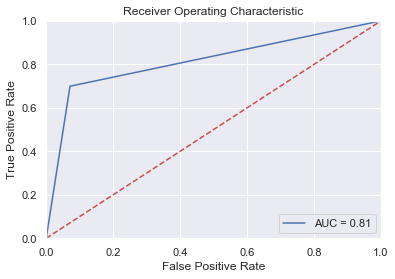

In [394]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_hat_test)
roc_auc = metrics.auc(fpr, tpr)
roc_auc_rf, fpr_rf, tpr_rf, thresholds_rf = roc_auc, fpr, tpr, thresholds

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [395]:
#try:
    #results # checks if this object exists or not
#except NameError:
    #results = pd.DataFrame(columns = ["algo", "acc_train", "acc_test"]) # initiates it

In [396]:
#model_name = str(clf_rf.__class__).split('.')[-1].strip("\"\'>")
#results.loc[len(results), 0:3] = [model_name, acc_train, acc_test]

#for hp in hypers.keys():
    #results.loc[len(results) - 1, hp] = hypers[hp]

# Gradient boosted classifier

Let's now train a gradient boosted classifier. Shrinkage is controlled by `learning_rate`.10% training data is used for validation.

In [397]:
from sklearn.ensemble import GradientBoostingClassifier

hypers = {"n_estimators": 100, "max_features": "sqrt", "max_depth": 20, "min_samples_leaf": 10, "learning_rate": 0.5}
clf_gb = GradientBoostingClassifier(loss = 'deviance', verbose = True, **hypers)

One again we train the classifier by calling `fit`.

In [398]:
clf_gb.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.8465            4.59s
         2           0.5747            5.13s
         3           0.4280            5.02s
         4           0.3326            4.91s
         5           0.2712            5.04s
         6           0.2242            4.98s
         7           0.1880            4.93s
         8           0.1623            4.93s
         9           0.1422            4.84s
        10           0.1207            4.79s
        20           0.0337            4.08s
        30           0.0102            3.51s
        40           0.0031            2.98s
        50           0.0010            2.45s
        60           0.0004            1.90s
        70           0.0002            1.31s
        80           0.0002            0.77s
        90           0.0002            0.34s
       100           0.0002            0.00s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=20,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=True,
                           warm_start=False)

I display the variable importance plot for a gradient boosted classifier as well. The results should not look very different from using random forests.

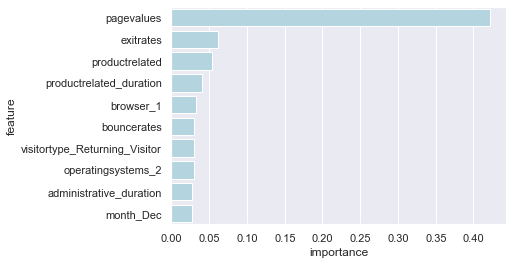

In [399]:
df_var_imp = pd.DataFrame({"feature": X_train.columns, 
                           "importance": clf_gb.feature_importances_})
df_var_imp.sort_values(by = "importance", ascending = False, inplace = True)

import seaborn as sns
ax = sns.barplot(x = "importance", y = "feature", data = df_var_imp.head(10), color = "lightblue")

7 features out of 10 are mutual between gradient boosted and ransom forest classifier

I now score the training and test sets with the trained model from the previous step.and obtain accuracy scores in either case.

In [400]:
Y_hat_train = clf_gb.predict(X_train)
Y_hat_test = clf_gb.predict(X_test)

In [401]:
acc_train = accuracy_score(y_train, Y_hat_train)
acc_test = accuracy_score(y_test, Y_hat_test)

In [402]:
acc_test

0.8950185261424455

In [403]:
acc_train 

1.0

In [404]:
print(classification_report(y_test, Y_hat_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2053
           1       0.68      0.62      0.65       376

    accuracy                           0.90      2429
   macro avg       0.80      0.78      0.79      2429
weighted avg       0.89      0.90      0.89      2429



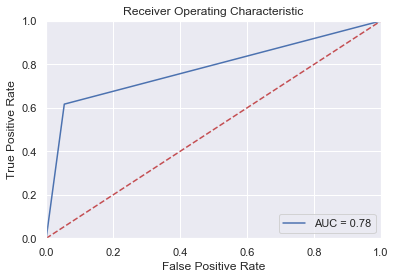

In [405]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_hat_test)
roc_auc = metrics.auc(fpr, tpr)
roc_auc_gbm, fpr_gbm, tpr_gbm, thresholds_gbm = roc_auc, fpr, tpr, thresholds

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM Classifier


good for models with few data points, assume linear separability, wide margin classifier because it gives us the line of separation that has the widest margin

we normalize our numeric features. It's important to normalize features when training an SVM algorithm.

In [406]:
from sklearn.preprocessing import StandardScaler

znormalizer = StandardScaler()
znormalizer.fit(X_train)
X_train_norm = pd.DataFrame(znormalizer.transform(X_train),columns=list(X_train))
X_test_norm = pd.DataFrame(znormalizer.transform(X_test),columns=list(X_train))

X_train_norm.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,...,traffictype_20,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9
0,-0.779483,-0.522495,-0.416345,-0.283529,-0.716134,-0.684429,-0.391279,1.761225,-0.523998,-0.279161,...,-0.099613,1.546801,-0.249331,-0.385265,-0.252608,-0.130237,-0.203394,-0.197004,-0.147483,-0.164225
1,-0.779483,-0.522495,-0.416345,-0.283529,-0.735984,-0.715860,5.131169,4.378259,-0.523998,-0.279161,...,-0.099613,-0.646496,-0.249331,-0.385265,-0.252608,-0.130237,-0.203394,-0.197004,-0.147483,6.089214
2,-0.779483,-0.522495,-0.416345,-0.283529,-0.716134,-0.714550,0.989333,2.808039,-0.523998,-0.279161,...,-0.099613,-0.646496,4.010737,-0.385265,-0.252608,-0.130237,-0.203394,-0.197004,-0.147483,-0.164225
3,-0.779483,-0.522495,-0.416345,-0.283529,-0.378685,-0.640124,0.044704,-0.213029,-0.523998,-0.279161,...,-0.099613,1.546801,-0.249331,-0.385265,-0.252608,-0.130237,-0.203394,-0.197004,-0.147483,-0.164225
4,-0.779483,-0.522495,-0.416345,-0.283529,-0.735984,-0.715860,5.131169,4.378259,-0.523998,2.090495,...,-0.099613,-0.646496,-0.249331,2.595614,-0.252608,-0.130237,-0.203394,-0.197004,-0.147483,-0.164225


In [407]:
X_train= X_train_norm # add columns
X_test = X_test_norm  # add columns
X_train.shape


(16488, 74)

Before I begin traning with SVMs, since SVMs are very compute heavy and may require a lot of tuning. While I do all this in search of the best model, it's worthwhile having a **baseline** against which we can compare performance. So I first train a logistic regression model and evalutate it. We chose logistic regression because it is efficient and does a good job even without much tuning.Logistic regression is a good baseline model for classification because it has a very high run time and efficient and it is simple. 

In [408]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter = 5000, solver = 'lbfgs')
logit.fit(X_train, y_train)

y_hat_train = logit.predict(X_train)
y_hat_test = logit.predict(X_test)

In [409]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2053
           1       0.68      0.39      0.49       376

    accuracy                           0.88      2429
   macro avg       0.79      0.68      0.71      2429
weighted avg       0.86      0.88      0.86      2429



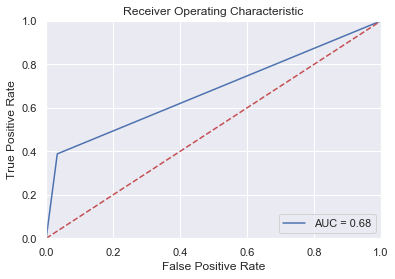

In [410]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat_test)
roc_auc = metrics.auc(fpr, tpr)
roc_auc_svm, fpr_svm, tpr_svm, thresholds_svm = roc_auc, fpr, tpr, thresholds

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

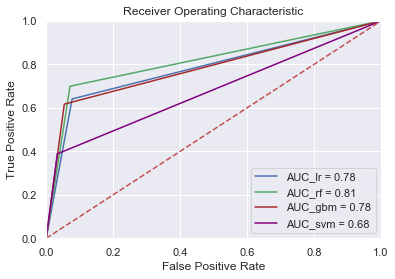

In [412]:
# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat_test)
# roc_auc = metrics.auc(fpr, tpr)
# roc_auc_svm = roc_auc

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC_lr = %0.2f' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, 'g', label = 'AUC_rf = %0.2f' % roc_auc_rf)
plt.plot(fpr_gbm, tpr_gbm, 'brown', label = 'AUC_gbm = %0.2f' % roc_auc_gbm)
plt.plot(fpr_svm, tpr_svm, 'purple', label = 'AUC_svm = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()